# Get the Data
You can download the data or just use the supplied csv in the repository. The data has the following features:
* datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather -
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [5]:
bike = read.csv("bikeshare.csv")
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


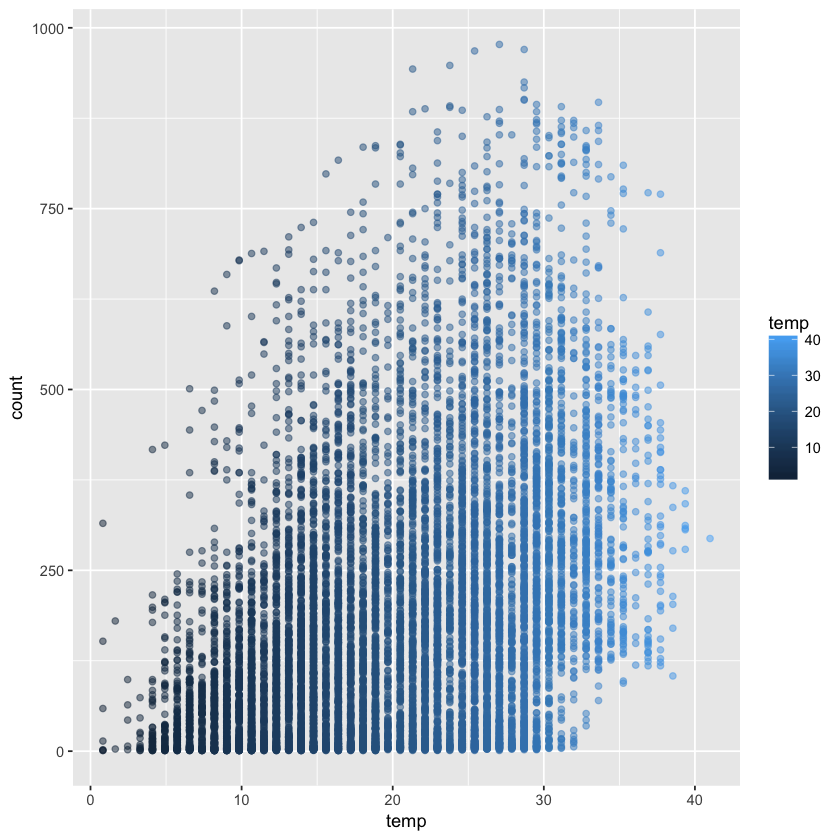

In [9]:
# Create a scatter plot of count vs temp. Set a good alpha value
library(ggplot2)
library(ggthemes)
pl1 = ggplot(bike, aes(x = temp, y = count)) + geom_point(aes(color = temp), alpha = 0.5)
pl1

**Plot count versus datetime as a scatterplot with a color gradient based on temperature. You'll need to convert the datetime column into POSIXct before plotting.**

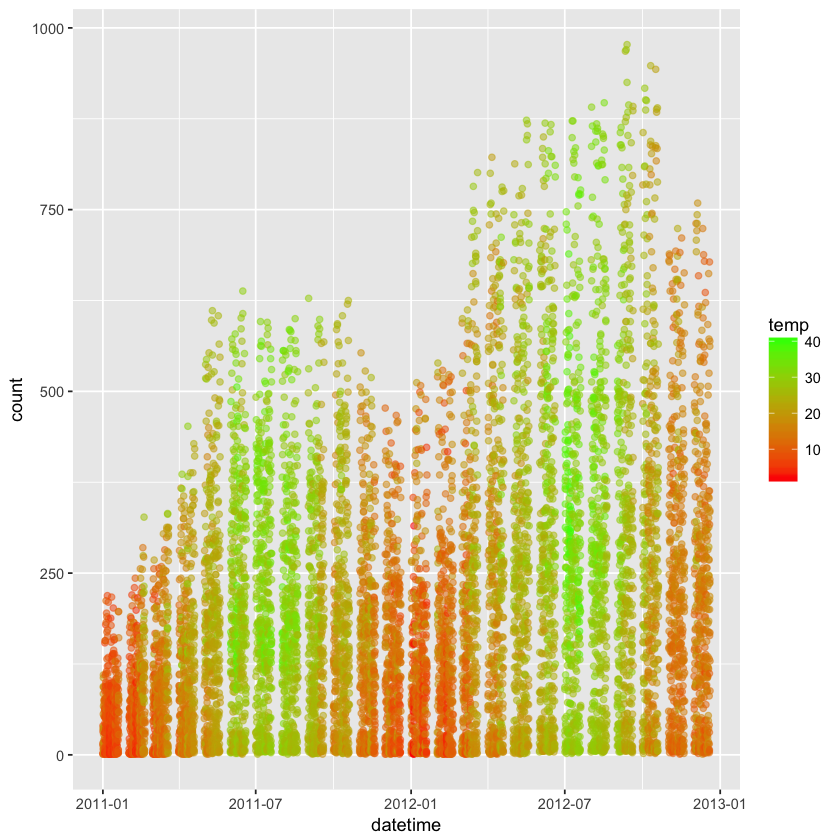

In [34]:
bike$datetime = as.POSIXct(bike$datetime)
pl1 = ggplot(bike, aes(x = datetime, y = count, color = temp)) + geom_point(alpha = 0.5) 
pl2 = pl1 + scale_color_gradient(low = "red" ,high= "green")
pl2

__What is the correlation between temp and count?__

In [38]:
cor(bike[,c('temp','count')])

,temp,count
temp,1.0000000,0.3944536
count,0.3944536,1.0000000


In [40]:
cor(bike$temp, bike$count)

[1] 0.3944536

__Let's explore the season data. Create a boxplot, with the y axis indicating count and the x axis begin a box for each season.__

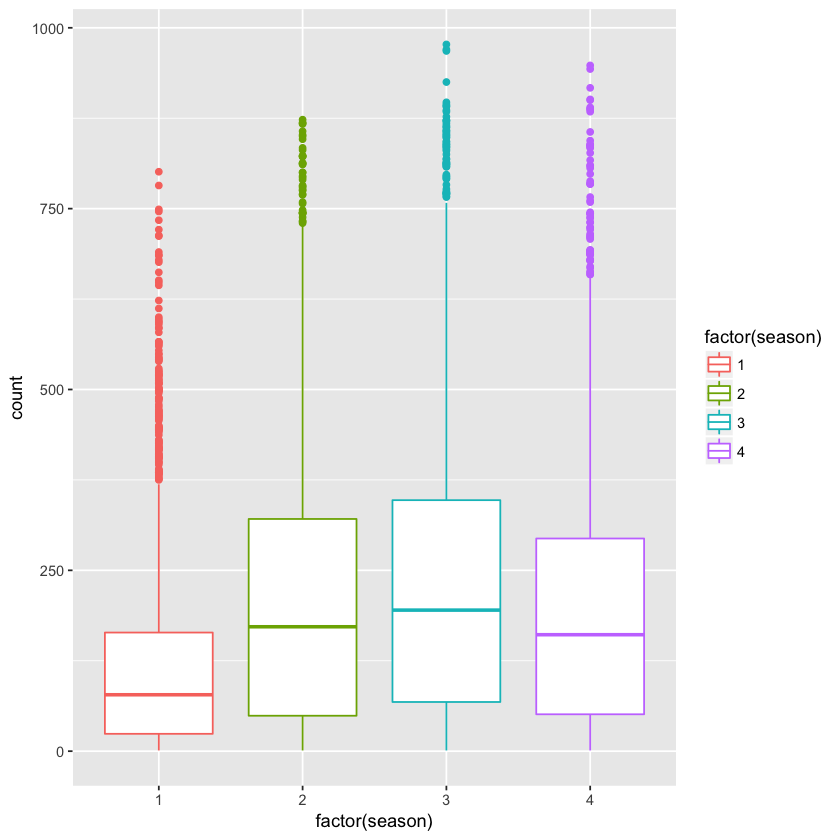

In [44]:
pl1 = ggplot(bike, aes(x=factor(season), y = count))
pl2 = pl1 + geom_boxplot(aes(color = factor(season)))
pl2

In [45]:
bike$hour = sapply(bike$datetime,function(x){format(x,"%H")})

head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


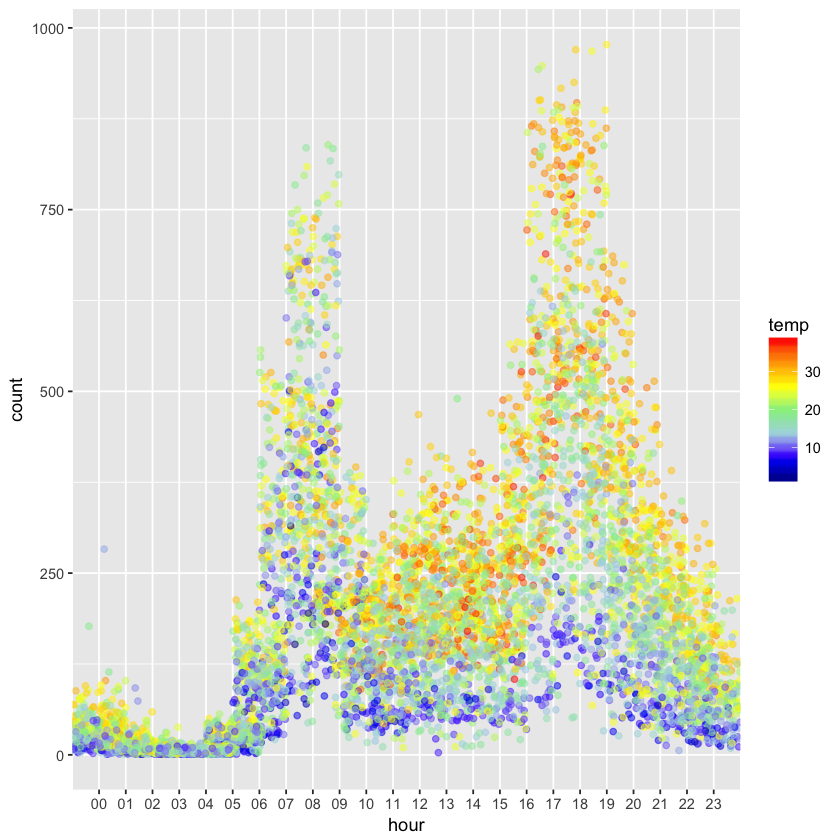

In [52]:
#scatterplot of count versus hour, with color scale based on temp. Only use bike data where workingday==1
library(dplyr)

pl = ggplot(filter(bike,workingday==1),aes(hour,count)) 
pl2 = pl + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.5)
pl3 = pl2 + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
pl3

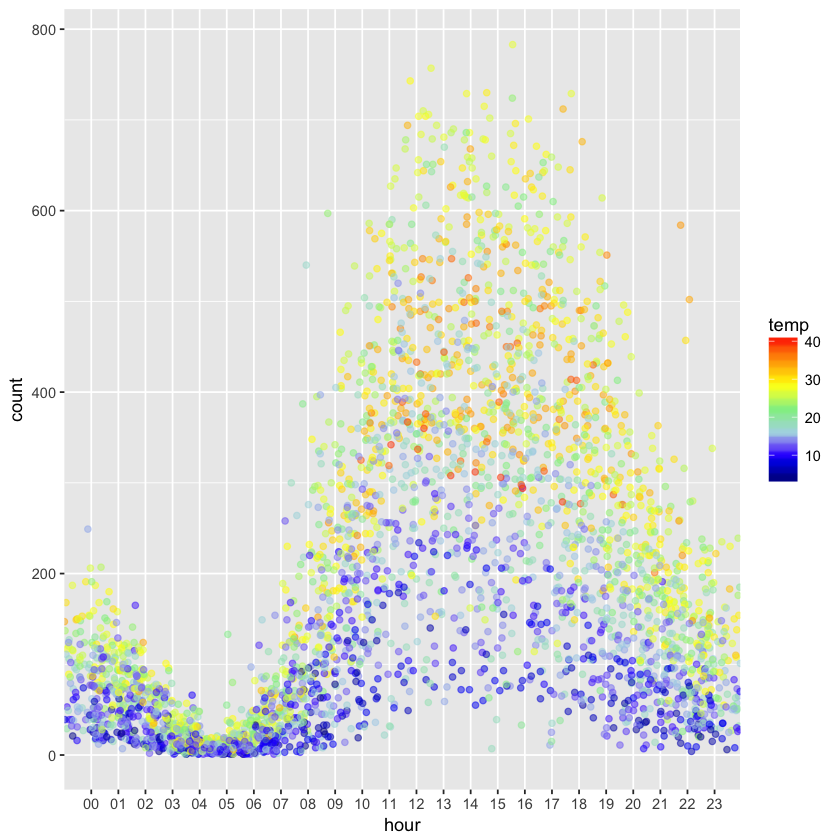

In [53]:
#scatterplot of count versus hour, with color scale based on temp. Only use bike data where workingday==0

library(dplyr)

pl = ggplot(filter(bike,workingday==0),aes(hour,count)) 
pl2 = pl + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.5)
pl3 = pl2 + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
pl3

In [54]:
#Use lm() to build a model that predicts count based solely on the temp feature, name it temp.model
temp.model = lm(temp ~ count, bike)

In [55]:
summary(temp.model)


Call:
lm(formula = temp ~ count, data = bike)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.5050  -5.8554  -0.1679   5.7700  19.7950 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.698e+01  9.989e-02  170.00   <2e-16 ***
count       1.697e-02  3.789e-04   44.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.16 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


In [56]:
bike$hour <- sapply(bike$hour,as.numeric)
model <- lm(count ~ . -casual - registered -datetime -atemp,bike )
summary(model)



Call:
lm(formula = count ~ . - casual - registered - datetime - atemp, 
    data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-value: < 2.2e-16
